# ***Sales Predictor for BigMart by Nguyen Chi Nghia - s3979170***

## **Description**

**BigMart**'s data scientists have gathered 2013 sales information for 1559 products from 10 stores located in various cities. Also, certain attributes of each product and store have been defined.

**Our Goal** is to create a prediction model and determine each product's sales at a certain store. With the help of this model, Our team will attempt to comprehend the features of the goods and the shops that are essential to boosting sales.

**The problem** is regression (supervised learning), so we will be using corresponding algorithms

## **Importing Libraries**

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.

**Seaborn** is a Python data visualization library based on matplotlib.

**Plotly** is an open-source library that can be used for interactive data visualization and understanding data simply and easily

**Scikit-learn** is a free software machine learning library for the Python programming language

**XGBoost** is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework

In [ ]:
import numpy as np # for convenience
import pandas as pd # for convenience
import matplotlib.pyplot as plt # for convenience
import seaborn as sns # for convenience
import plotly.express as px # for convenience
import plotly.graph_objects as go  # for convenience
import plotly.figure_factory as ff # for convenience
from xgboost import XGBRegressor # a machine learning algorithm
from sklearn import metrics # used to monitor and measure the performance of a model
from sklearn.preprocessing import LabelEncoder # converts the labels into a numeric form so as to convert them into the machine-readable form
from sklearn.model_selection import train_test_split # avoiding overfitting
from sklearn.preprocessing import StandardScaler # standardizes a feature by subtracting the mean and then scaling to unit variance
from sklearn.linear_model import LinearRegression # a machine learning algorithm
from sklearn.ensemble import RandomForestRegressor # a machine learning algorithm
sns.set()

## **Data Collection**


is the the process of gathering data for use in business decision-making, strategic planning, research and other purposes. It's a crucial part of data analytics applications and research projects: Effective data collection provides the information that's needed to answer questions, analyze business performance or other outcomes, and predict future trends, actions and scenarios.

But in our case all we have to do is to load to our dataframe since this data is publicly available from Kaggle (https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data)  

In [ ]:
# loading the dataset from csv file to a Pandas DataFrame (DF)
data = pd.read_csv('/content/drive/MyDrive/__projects/project_data/train.csv')
data_test = pd.read_csv("/content/drive/MyDrive/__projects/project_data/test.csv")

## **Data Preprocessing**

is the process of manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the whole pipeline. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values (e.g., Income: −100), impossible data combinations (e.g., Sex: Male, Pregnant: Yes), and missing values, etc.

In [ ]:
data.head() #  Very useful for accessing a small part of the dataframe quickly.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(*data.columns)

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type Item_Outlet_Sales


* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.

**Categorical data** refers to a data type that can be stored and identified based on the names or labels given to them.

**Numerical data** refers to the data that is in the form of numbers, and not in any language or descriptive form.

Catergorical Features in this case:


*   Item_Identifier
*   Item_Fat_content

*   Item_Type
*   Outlet_Identifier
- Outlet_Size                
- Outlet_Location_Type       
- Outlet_Type







In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

In [ ]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
print(data.shape)
print(data_test.shape)

(8523, 12)
(5681, 11)


In [ ]:
# checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64



---

**Why missing values treatment is required?**

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to the wrong predictions.


---

**Replacing missing values with mean**

This is the most common method of imputing missing values of numeric columns. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.


---


**Mean** - Average value

**Mode** - Most repeated value



---



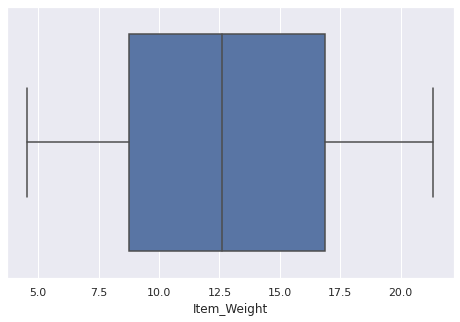

In [ ]:
 # checking for outliers
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=data)
plt.show()

Outlier is a value that "lies outside" (is much smaller or larger than) most of the other values in a set of data. Identification of potential outliers is important for the following reasons. An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly.

**Conclusion:**

The box plot above clearly shows no outliers, hence we can fill the missing values with mean

In [ ]:
# mean value of "Item_Weight"
print(data['Item_Weight'].mean())
print(data_test['Item_Weight'].mean())

12.857645184135976
12.695633368756642


In [ ]:
 # filling the missing values in "Item_Weight" column with "Mean" Value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data_test['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [ ]:
data.isnull().sum() # checking if it worked

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing missing values in "Outlet_Size" with mode since it is used in the case of categorical features

In [ ]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum() # checking if it worked

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)
data_test.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts() # checking if it worked

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## **Exploratory Data Analysis**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

In [ ]:
# Item_MRP Distribution
x = data['Item_MRP']
fig = ff.create_distplot([x], ['MRP'], bin_size=10, show_rug=False)
fig.update_layout(title_text='Sampled Results',
                  xaxis_title_text='Item_MRP',
                  width=700,
                  height=500,
                  bargap=0.05)
fig.show()

We have more products in the range of 100 MRP - 180 MRP



In [ ]:
# Item_Weight Distribution
x = data['Item_Weight']
fig = ff.create_distplot([x], ['Number of Items'], bin_size=0.5, show_rug=False)
fig.update_layout(title_text='Sampled Results',
                  xaxis_title_text='Weight',
                  width=700,
                  height=500,
                  bargap=0.05)
fig.show()
print(x.mean())

12.857645184135976


In [ ]:
# Item_Visibility Distribution
x = data['Item_Visibility']
fig = ff.create_distplot([x], ['Number'], bin_size=0.005, show_rug=False)
fig.update_layout(title_text='Sampled Results',
                  xaxis_title_text='Visibility',
                  width=700,
                  height=500,
                  bargap=0.05)
fig.show()

In [ ]:
# Item_Outlet_Sales Distribution
x = data['Item_Outlet_Sales']
fig = ff.create_distplot([x], ['Number'], bin_size=150, show_rug=False)
fig.update_layout(title_text='Sampled Results',
                  xaxis_title_text='Outlet Sales',
                  width=700,
                  height=500,
                  bargap=0.05)
fig.show()

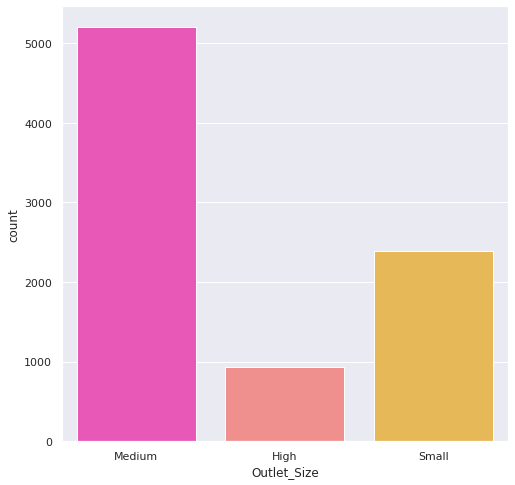

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Size', data=data, palette='spring')
plt.show()

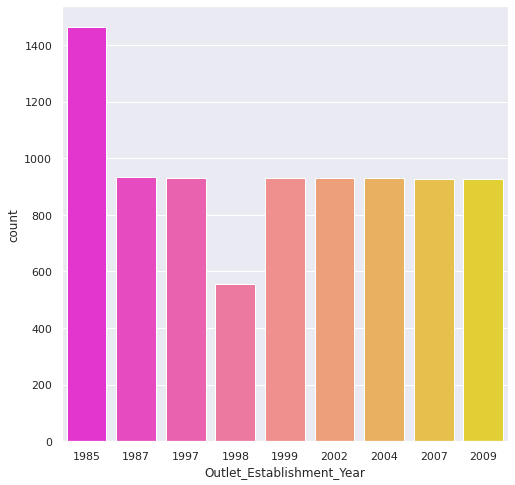

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Establishment_Year', data=data, palette='spring')
plt.show()

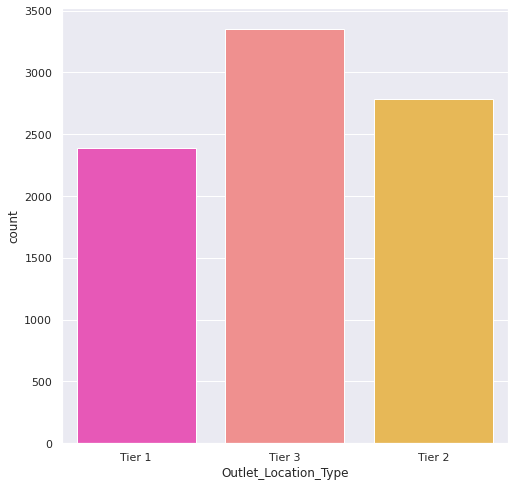

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Location_Type',data=data,palette='spring')
plt.show()

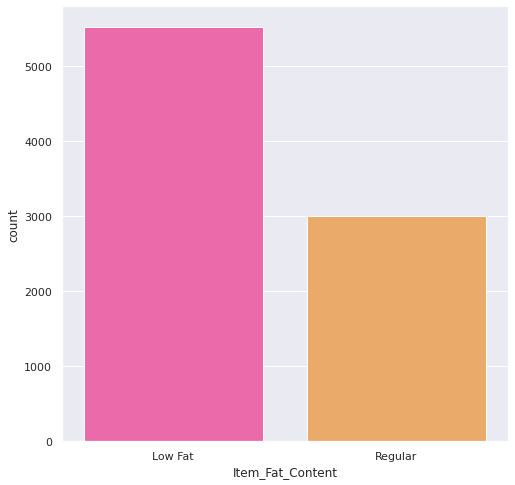

In [ ]:
#Item Fat Content
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content', data=data, palette='spring')
plt.show()

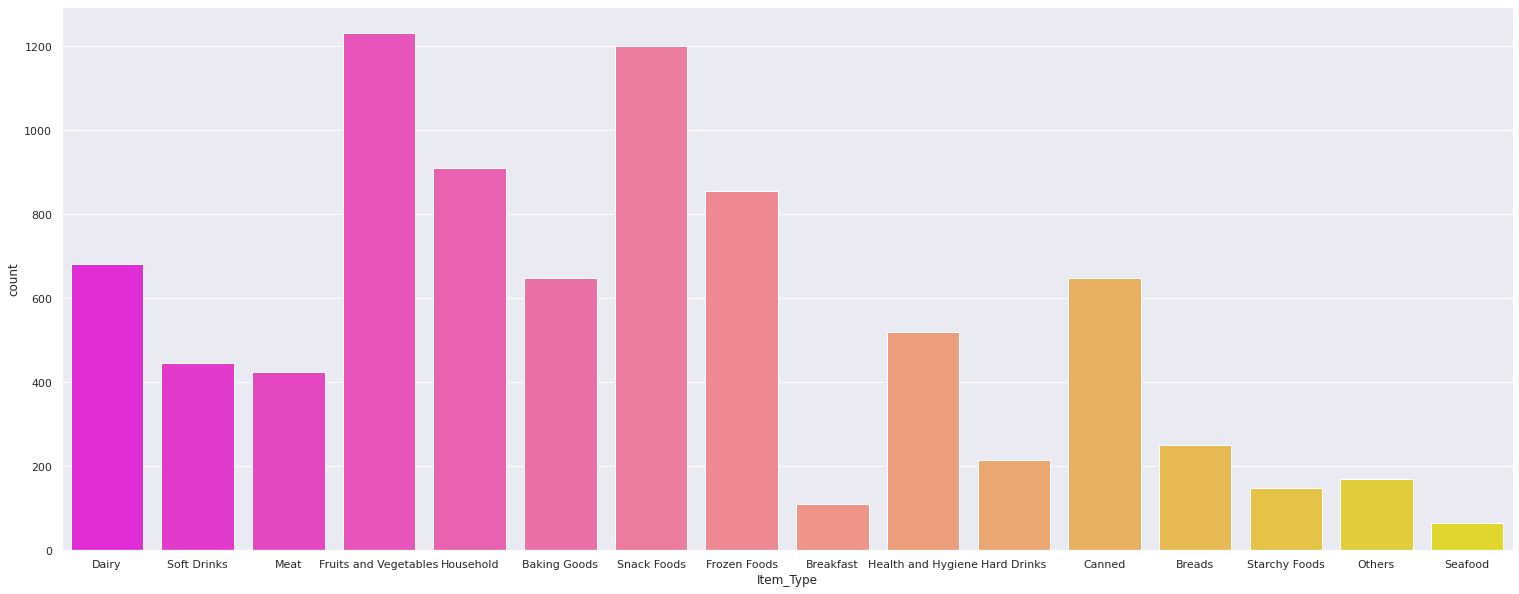

In [ ]:
1 #Item Type
plt.figure(figsize=(26,10))
sns.countplot(x='Item_Type', data=data, palette='spring')
plt.show()

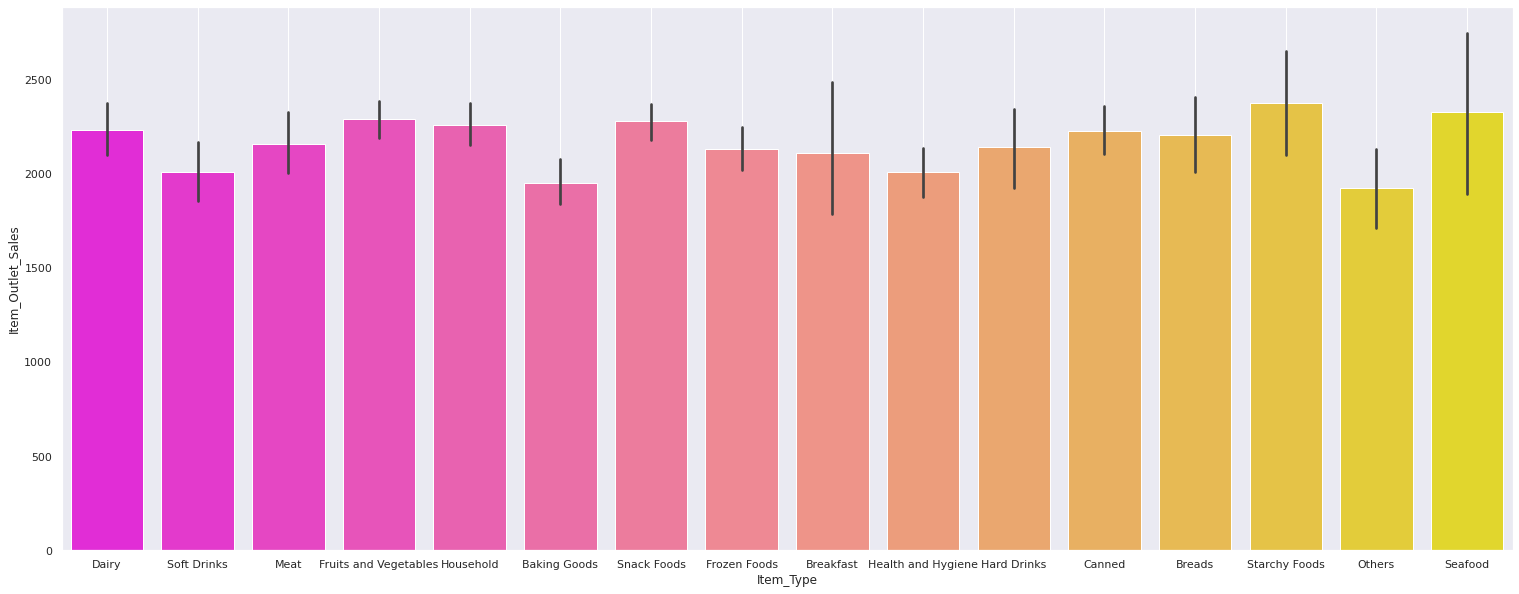

In [ ]:
plt.figure(figsize=(26,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=data, palette='spring')
plt.grid()

Conclusion:

From the illustration above, we can tell items like fruits and vegetables, household goods, snacks, starchy foods and seafood are more sold than the other items so the mall should consider keeping more of these items in inventory, give special offers and discounts to these goods so volume of sales increases more.

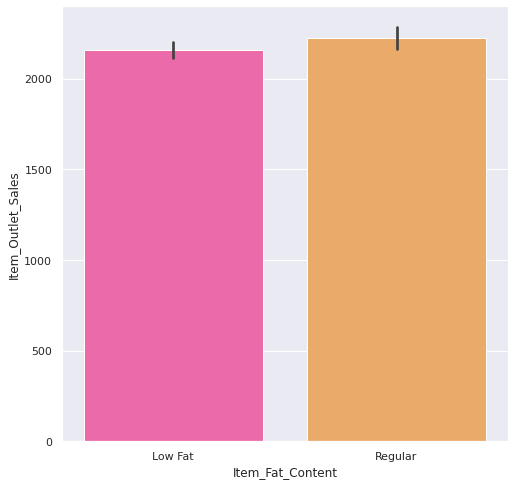

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data,palette='spring')
plt.show()

Concolusion

The Item Outles sales are high for both Low Fat and Regular Item types.



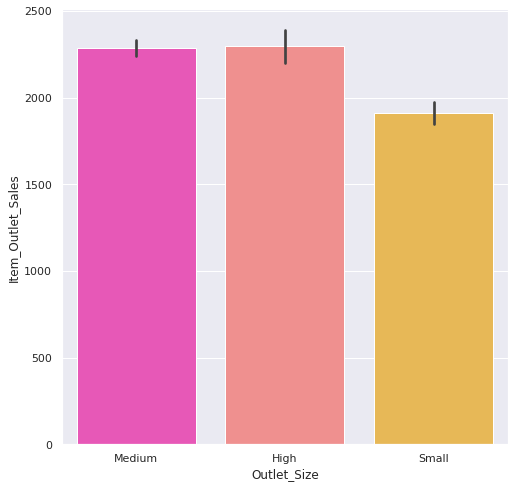

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='spring')
plt.show()

Conclusion:

High Outlet Size has maximum outlet sales



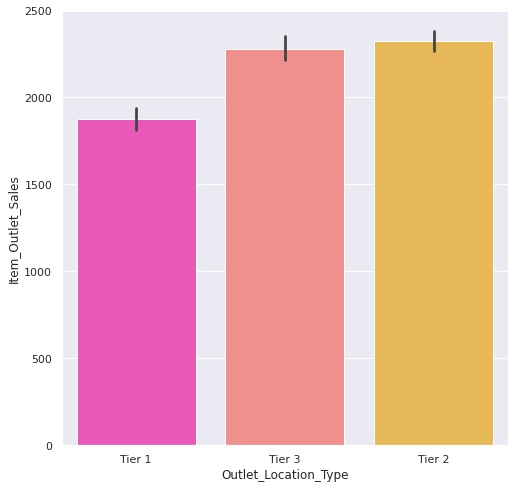

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='spring')
plt.show()

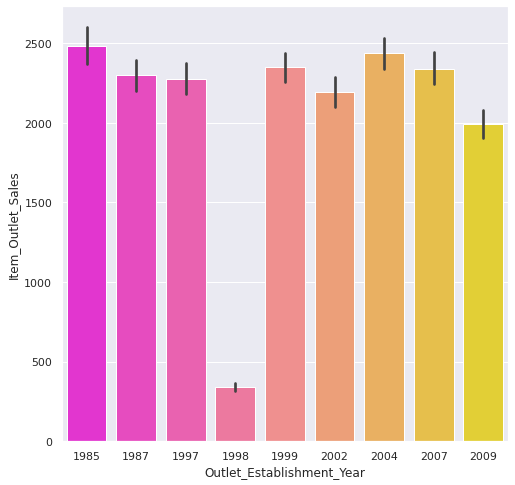

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data,palette='spring')
plt.show()

## **Model(s) Building**

**Building a model** in machine learning is creating a mathematical representation by generalizing and learning from training data. Then, the built machine learning model is applied to new data to make predictions and obtain results

In [ ]:
encoder = LabelEncoder()

**Label Encoding** refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.



In [ ]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [ ]:
data_test['Item_Identifier'] = encoder.fit_transform(data_test['Item_Identifier'])
data_test['Item_Fat_Content'] = encoder.fit_transform(data_test['Item_Fat_Content'])
data_test['Item_Type'] = encoder.fit_transform(data_test['Item_Type'])
data_test['Outlet_Identifier'] = encoder.fit_transform(data_test['Outlet_Identifier'])
data_test['Outlet_Size'] = encoder.fit_transform(data_test['Outlet_Size'])
data_test['Outlet_Location_Type'] = encoder.fit_transform(data_test['Outlet_Location_Type'])
data_test['Outlet_Type'] = encoder.fit_transform(data_test['Outlet_Type'])

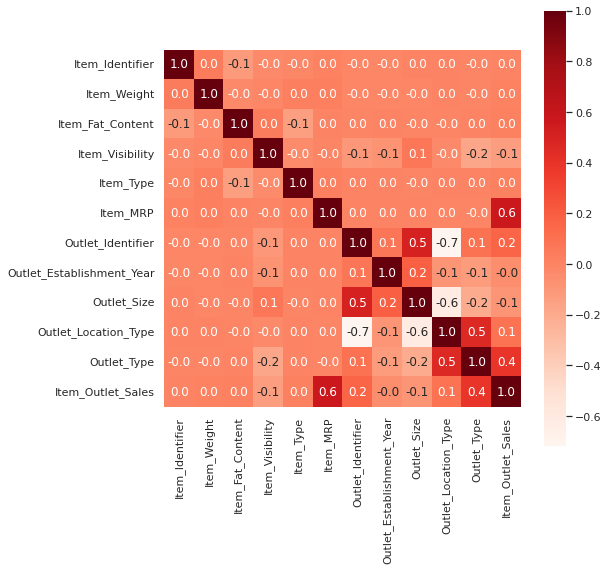

In [ ]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
plt.show()

**Correlation Matrix**

A correlation matrix denotes the correlation coefficients between variables at the same time.

A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.

The heat map transforms the correlation matrix into color coding.

The correlation matrix shows how the variables are correlated to each other on a scale of -1 to 1, with 1 being a perfect positive correlation and -1 being a perfect inverse correlation.

**Conclusion**

Item_MRP and Outlet_Type are the most correlated features with Item_Outlet_Sales.

Even though heatmaps shows that most features do not have any correlation with our target, we believe the plot has its limitations, therefore we are not going to drop any features to prevent losing objectivity of the prediction.

In [ ]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']
_X = data_test

In [ ]:
data.head() # checking if it worked

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

What we did here is data splitting. In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.

**Linear Regression**

is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

It is one of the first models we encounter learning ML, and even though it is pretty simple to understand, the model has its own nuance and get very complex

In [ ]:
LR = LinearRegression(normalize=True)

In [ ]:
LR.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

**Random Forest Regressor**

is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
RFR = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=26)

In [ ]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=26)

**XGBREgressor**

In [ ]:
Xregressor = XGBRegressor()

XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm. The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

We decided to include this implementation of the model because it is relatively a new technique that actually does its job very well compared to others.

In [ ]:
Xregressor.fit(X_train, Y_train)

[08:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## **Evaluation**

**Model evaluation** is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

**R-Squared metric**

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

If R-squared value < 0.3 this value is generally considered a **none or very weak effect size**

If R-squared value 0.3 < r < 0.5 this value is generally considered a **weak or low effect size**

If R-squared value 0.5 < r < 0.7 this value is generally considered a **moderate effect size**

If R-squared value r > 0.7 this value is generally considered **strong effect size**




---


Ref: Source: Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). The basic practice of statistics (6th ed.). New York, NY: W. H. Freeman and Company. Page (138).

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#predicting on training data
predictions = Xregressor.predict(X_train)
print('xgbregressor', r2_score(Y_train, predictions))
predictions = LR.predict(X_train)
print('linear regression', r2_score(Y_train, predictions))
predictions = RFR.predict(X_train)
print('random forest regressor', r2_score(Y_train, predictions))

xgbregressor 0.6375106347833781
linear regression 0.512351858846632
random forest regressor 0.6074868572522745


In [ ]:
#predicting on test data
predictions = Xregressor.predict(X_test)
print('xgbregressor', metrics.r2_score(Y_test, predictions))
predictions = LR.predict(X_test)
print('linear regression',metrics.r2_score(Y_test, predictions))
predictions = RFR.predict(X_test)
print('random forest regressor', metrics.r2_score(Y_test, predictions))

xgbregressor 0.5835473937493787
linear regression 0.5017684308531454
random forest regressor 0.578248061881758


**MAE** **and** **MSE**

MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#predicting on training data
predictions = Xregressor.predict(X_train)
print('xgbregressor')
print('MAE:', mean_absolute_error(Y_train, predictions))
print('MSE:', mean_squared_error(Y_train, predictions), '\n')
predictions = LR.predict(X_train)
print('linear regression ')
print('MAE:', mean_absolute_error(Y_train, predictions))
print('MSE:', mean_squared_error(Y_train, predictions), '\n')
predictions = RFR.predict(X_train)
print('random forest regressor')
print('MAE:', mean_absolute_error(Y_train, predictions))
print('MSE:', mean_squared_error(Y_train, predictions), '\n')

xgbregressor
MAE: 724.2310929931742
MSE: 1052957.4745096003 

linear regression 
MAE: 893.9727107177582
MSE: 1416518.1228180379 

random forest regressor
MAE: 750.7952759172841
MSE: 1140170.4081786936 



In [ ]:
#predicting on test data
predictions = Xregressor.predict(X_test)
print('xgbregressor')
print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions), '\n')
predictions = LR.predict(X_test)
print('linear regression ')
print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions), '\n')
predictions = RFR.predict(X_test)
print('random forest regressor')
print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions), '\n')

xgbregressor
MAE: 771.7756046529603
MSE: 1224029.6038990011 

linear regression 
MAE: 909.3985735455126
MSE: 1464392.7810258297 

random forest regressor
MAE: 779.6216261915267
MSE: 1239605.2996432353 



## **Business Perspective/Insights**

Overall, after thorough analysis we came up with these conclusions:


*   The most important factor that maximises the Outlet Sales is Item_MRP (Material Requirement Planning)
*   Establishment Year also affects the Outlet Sales (The established it is, the more loyal customers it has => more sales)
*   Outlet Type (supermarket or grocery store) has correlation with the Outlet Sales.

If BigMart is going to make strategic plans to increase sales, they should target those 3 variables ^^







## **Conclusion**

To be perfectly honest, we believe that our project was simple enough and would take professional data scientist hours to make it at worst. But for us it wasn’t about the project. It was about the learning curve each of us as a first-semester-student had to go through. And that part wasn’t easy by any means.

**Thank you!**